### Data Analysis on Online course Enrollment Data
#### OutComes
- Identify keyword
- Calculate statistics and visualization
- Identify genres
- Identify the largest enrollment course

In [1]:
# Lib Required 
# !pip install seaborn
# !pip install wordcloud
# !pip install pandas
# !pip install matplotlib

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
%matplotlib inline

In [4]:
random_state = 123
course_genre_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML321EN-SkillsNetwork/labs/datasets/course_genre.csv"
ratings_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMSkillsNetwork-ML0321EN-Coursera/labs/v2/module_3/ratings.csv"

In [6]:
course_df = pd.read_csv(course_genre_url)
ratings_df = pd.read_csv(ratings_url)
course_df.head()

,COURSE_ID,TITLE,Database,Python,CloudComputing,DataAnalysis,Containers,MachineLearning,ComputerVision,DataScience,BigData,Chatbot,R,BackendDev,FrontendDev,Blockchain
0,ML0201EN,robots are coming build iot apps with watson ...,0,0,0,0,0,0,0,0,0,0,0,1,1,0
1,ML0122EN,accelerating deep learning with gpu,0,1,0,0,0,1,0,1,0,0,0,0,0,0
2,GPXX0ZG0EN,consuming restful services using the reactive ...,0,0,0,0,0,0,0,0,0,0,0,1,1,0
3,RP0105EN,analyzing big data in r using apache spark,1,0,0,1,0,0,0,0,1,0,1,0,0,0
4,GPXX0Z2PEN,containerizing packaging and running a sprin...,0,0,0,0,1,0,0,0,0,0,0,1,0,0


In [7]:
course_df.columns

Index(['COURSE_ID', 'TITLE', 'Database', 'Python', 'CloudComputing',
       'DataAnalysis', 'Containers', 'MachineLearning', 'ComputerVision',
       'DataScience', 'BigData', 'Chatbot', 'R', 'BackendDev', 'FrontendDev',
       'Blockchain'],
      dtype='object')

In [9]:
print(course_df.shape[0])
course_df.dtypes

307


COURSE_ID          object
TITLE              object
Database            int64
Python              int64
CloudComputing      int64
DataAnalysis        int64
Containers          int64
MachineLearning     int64
ComputerVision      int64
DataScience         int64
BigData             int64
Chatbot             int64
R                   int64
BackendDev          int64
FrontendDev         int64
Blockchain          int64
dtype: object

In [10]:
course_df.iloc[1, ]

COURSE_ID                                     ML0122EN
TITLE              accelerating deep learning with gpu
Database                                             0
Python                                               1
CloudComputing                                       0
DataAnalysis                                         0
Containers                                           0
MachineLearning                                      1
ComputerVision                                       0
DataScience                                          1
BigData                                              0
Chatbot                                              0
R                                                    0
BackendDev                                           0
FrontendDev                                          0
Blockchain                                           0
Name: 1, dtype: object

In [11]:
# Joining all the title value into one string
titles = " ".join(title for title in course_df['TITLE'].astype(str))

In [12]:
titles

'robots are coming  build iot apps with watson  swift  and node red accelerating deep learning with gpu consuming restful services using the reactive jax rs client analyzing big data in r using apache spark containerizing  packaging  and running a spring boot application cloud native security conference  data security data science bootcamp with r for university proffesors learn how to use docker containers for iterative development scorm test course create your first mongodb database testing microservices with the arquillian managed container cloud pak for integration essentials watson analytics for social media data science bootcamp with python for university professors  advance create a cryptocurrency trading algorithm in python data   ai essentials securing java microservices with eclipse microprofile json web token  microprofile jwt  enabling distributed tracing in microservices with zipkin sql access for hadoop ybrid cloud conference  ai pipelines lab dataops methodology data   ai

In [13]:
# Now filtering stopwords
stopwords = set(STOPWORDS)
stopwords.update(["getting started", "using", "enabling", "template", "university", "end", "introduction", "basic"])

In [14]:
wordcloud = WordCloud(stopwords=stopwords, background_color = "white", width=800, height=400)

In [15]:
wordcloud.generate(titles)

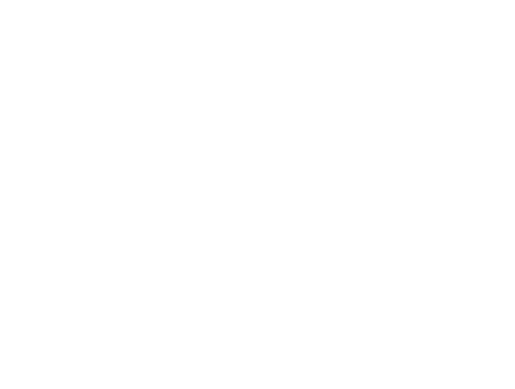

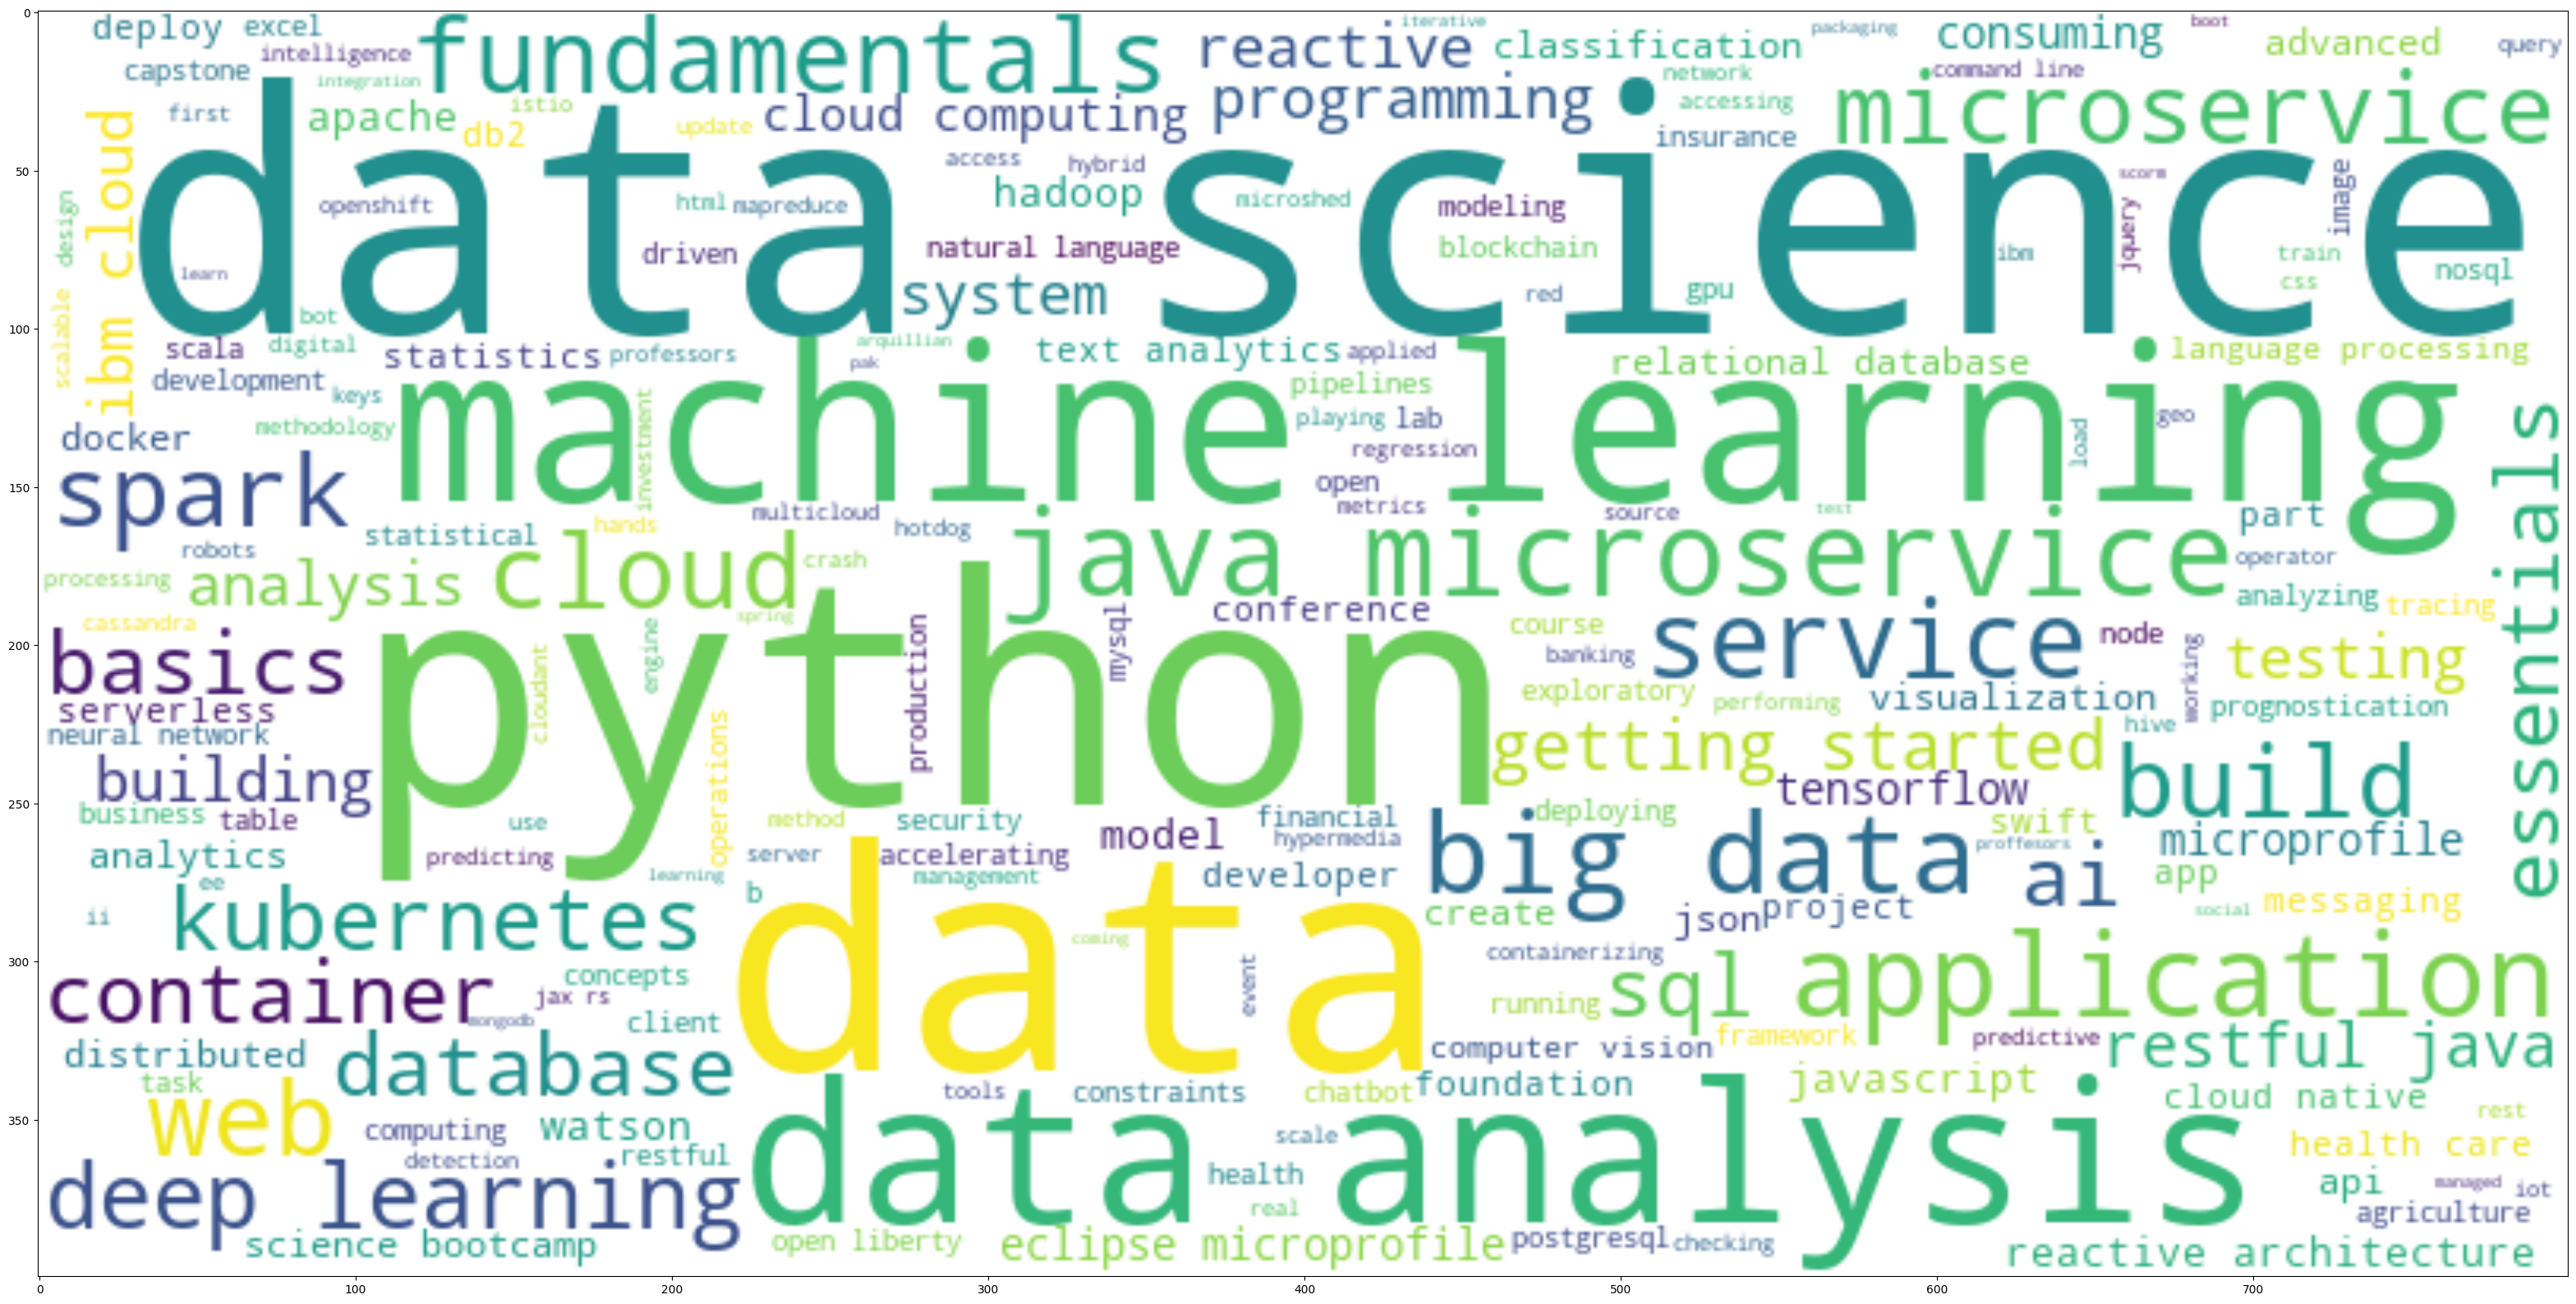

In [17]:
plt.axis("off")
plt.figure(figsize=(40,20))
plt.tight_layout(pad=0)
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

In [25]:
# Extra 
course_df['MachineLearning'] == 1
# ml_courses = course_df[indexes]
course_df['BigData'] == 1


0      False
1      False
2      False
3       True
4      False
       ...  
302    False
303    False
304    False
305    False
306    False
Name: BigData, Length: 307, dtype: bool

In [26]:
genres = course_df.columns[2:]
genres

Index(['Database', 'Python', 'CloudComputing', 'DataAnalysis', 'Containers',
       'MachineLearning', 'ComputerVision', 'DataScience', 'BigData',
       'Chatbot', 'R', 'BackendDev', 'FrontendDev', 'Blockchain'],
      dtype='object')

### CourseEnrollments

In [28]:
ratings_df.head()

,user,item,rating
0,1889878,CC0101EN,5
1,1342067,CL0101EN,3
2,1990814,ML0120ENv3,5
3,380098,BD0211EN,5
4,779563,DS0101EN,3


In [29]:
ratings_df['rating'].unique()

array([5, 3, 4], dtype=int64)

In [33]:
ratings_df.shape

(233306, 3)

In [53]:
user_rating_count = ratings_df.groupby('user').size()
total_users = user_rating_count.shape[0]
print(f"Total number of users: {total_users}")

Total number of users: 33901


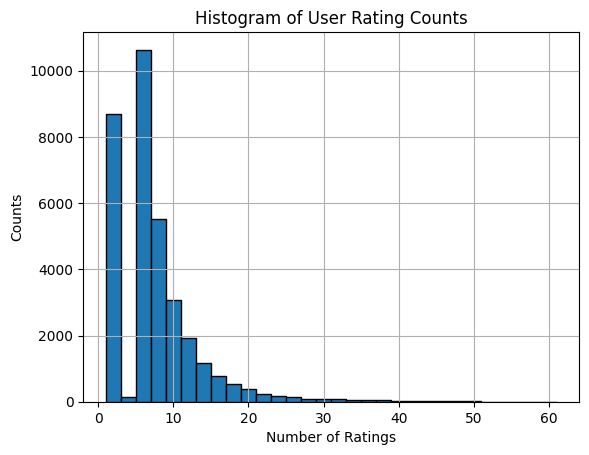

In [67]:
user_rating_count.hist(bins=30, edgecolor='black')
plt.title('Histogram of User Rating Counts')
plt.xlabel('Number of Ratings')
plt.ylabel('Counts')
plt.show()


In [57]:
item_rating_count = ratings_df.groupby('item').size()
top_20_courses = item_rating_count.sort_values(ascending=False).head(20)
print(top_20_courses)

item
PY0101EN      14936
DS0101EN      14477
BD0101EN      13291
BD0111EN      10599
DA0101EN       8303
DS0103EN       7719
ML0101ENv3     7644
BD0211EN       7551
DS0105EN       7199
BC0101EN       6719
DV0101EN       6709
ML0115EN       6323
CB0103EN       5512
RP0101EN       5237
ST0101EN       5015
CC0101EN       4983
CO0101EN       4480
DB0101EN       3697
BD0115EN       3670
DS0301EN       3624
dtype: int64


In [64]:
top_20_courses_df = top_20_courses.reset_index()
top_20_courses_df.columns = ['COURSE_ID', 'rating_count'] 
merged_df = top_20_courses_df.merge(course_df[['COURSE_ID', 'TITLE']], on='COURSE_ID', how='left')
print(merged_df)

     COURSE_ID  rating_count                                         TITLE
0     PY0101EN         14936                       python for data science
1     DS0101EN         14477                  introduction to data science
2     BD0101EN         13291                                  big data 101
3     BD0111EN         10599                                    hadoop 101
4     DA0101EN          8303                     data analysis with python
5     DS0103EN          7719                      data science methodology
6   ML0101ENv3          7644                  machine learning with python
7     BD0211EN          7551                          spark fundamentals i
8     DS0105EN          7199  data science hands on with open source tools
9     BC0101EN          6719                         blockchain essentials
10    DV0101EN          6709                data visualization with python
11    ML0115EN          6323                             deep learning 101
12    CB0103EN          5

In [65]:
total = ratings_df.shape[0]
total

233306

In [66]:
total_ratings = ratings_df['item'].value_counts().sum()
top_20_percentage = top_20_courses.sum() / total_ratings * 100
print(f"Percentage of the top-20 course enrollments: {top_20_percentage:.2f}%")


Percentage of the top-20 course enrollments: 63.30%
